In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import itertools

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practicum/v1/df')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df

,SEQNO,RECTYPE,REPTYPE,ORIGYEAR,WORKSTAT,LICNSTAT,LICNFELD,PRACTAGE,GRAD,ALEGATN1,OUTCOME,MALYEAR1,TOTALPMT,AAYEAR,TOTALPMT_FLOAT,Year,INF_FACTOR,TOTALPMT_ADJ,BASE_YEAR,PRACTEXP,PRACTEXP_ADJ,PRACTEXP_GROUP,TOTALPMT_GROUP,TOTALPMT_ADJ_GROUP,Label_ALEGATN1,Label_LICNFELD,Label_OUTCOME,PMT,COUNT
0,1,A,301,1991,OK,OK,10,60.0,1950.0,NaN,NaN,NaN,NaN,1990.0,NaN,1991,1.976468,NaN,1990.0,40.0,40.0,40.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1
1,2,A,301,1991,OK,OK,10,40.0,1960.0,NaN,NaN,NaN,NaN,1990.0,NaN,1991,1.976468,NaN,1990.0,30.0,30.0,30.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1
2,4,A,301,1991,MA,MA,15,30.0,1980.0,NaN,NaN,NaN,NaN,1990.0,NaN,1991,1.976468,NaN,1990.0,10.0,10.0,10.0,NaN,NaN,NaN,Physician Resident (MD),NaN,0,1
3,6,A,301,1990,OK,OK,10,40.0,1970.0,NaN,NaN,NaN,NaN,1990.0,NaN,1990,2.059640,NaN,1990.0,20.0,20.0,20.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1
4,8,A,301,1990,OK,OK,10,40.0,1970.0,NaN,NaN,NaN,NaN,1990.0,NaN,1990,2.059640,NaN,1990.0,20.0,20.0,20.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557696,1945008,C,302,2020,NaN,CA,100,40.0,2000.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,20.0,20.0,20.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1
1557697,1945009,C,302,2020,NaN,NM,100,40.0,2010.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,10.0,10.0,10.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1
1557698,1945010,C,302,2020,NaN,NM,100,40.0,2010.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,10.0,10.0,10.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1
1557699,1945011,C,302,2020,NaN,NM,100,30.0,2010.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,10.0,10.0,10.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1


Analysis

In [ ]:
feature = 'Label_ALEGATN1'

The goal of this analysis is to find a numerical basis for including ALEGATN1 as a variable in our model. For probability, one way to substantiate is to show that there is significant variance in the probabilities of a claim resulting in a payment based upon a practitioner's licensing state.

In [ ]:
df = df[[feature, 'PMT', 'TOTALPMT_ADJ']]
df['count'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Below, probability is simpy the the number of rows for each ALEGATN1 where totalpmt is greater than zero divided by the number of rows for each ALEGATN1.


In [ ]:
df = df.groupby(by = feature).sum()
df['Probability'] = df['PMT']/df['count']
df = df.sort_values(by = 'Probability', ascending = False)
df[feature] = df.index
df

,PMT,TOTALPMT_ADJ,count,Probability,Label_ALEGATN1
Label_ALEGATN1,,,,,
False Imprisonment,26,3.303210e+06,26,1.000000,False Imprisonment
Pathology Error,452,2.489413e+08,452,1.000000,Pathology Error
Failure to Delay a Case When Indicated,387,2.474601e+08,387,1.000000,Failure to Delay a Case When Indicated
"Problem with Appliance, Prostheses, Orthotic, Device, etc.",1577,2.022344e+08,1577,1.000000,"Problem with Appliance, Prostheses, Orthotic, ..."
Failure to Ensure Patient Safety,941,1.855195e+08,941,1.000000,Failure to Ensure Patient Safety
...,...,...,...,...,...
Improper Conduct,590,6.815391e+07,2195,0.268793,Improper Conduct
"Failure to Protect a Third Party (Failure to Warn, etc.)",52,3.120371e+07,226,0.230088,Failure to Protect a Third Party (Failure to W...
Wrongful Life/Birth,58,4.599621e+07,316,0.183544,Wrongful Life/Birth


In [ ]:
check = df['count'].sum()
check

# The result 1,422,676 is from exclusion of rows where LICNSTAT is null

474429

Graph

In [ ]:
# sort values by 'count' to form
df = df.sort_values(by = 'Probability', ascending = False)

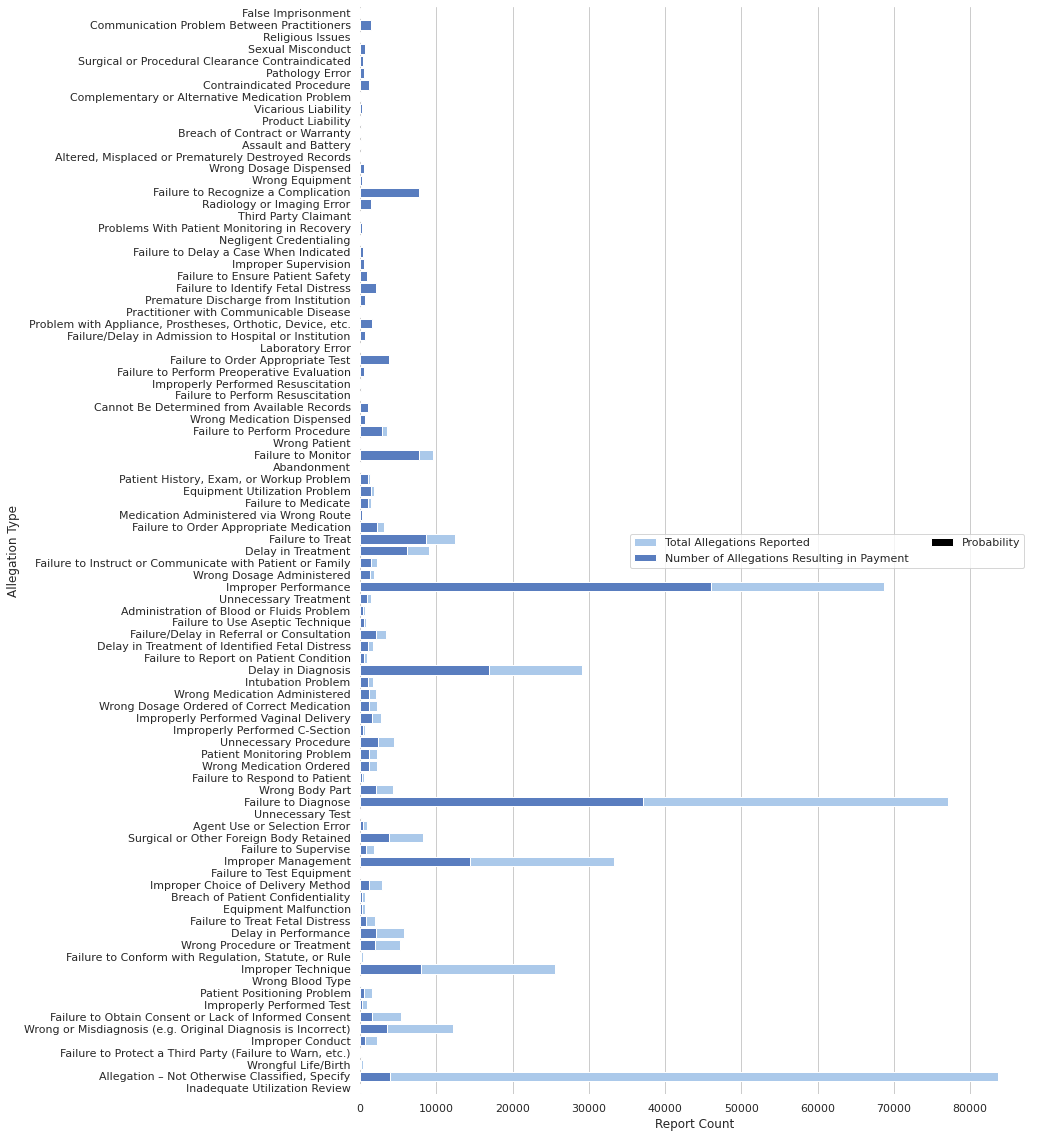

In [ ]:
fig, ax = plt.subplots(figsize=(12, 20))

sns.set_theme(style="whitegrid")

sns.set_color_codes("pastel")
chart_1 = sns.barplot(x="count", y=feature, data=df, label="Total Allegations Reported", color="b")

sns.set_color_codes("muted")
chart_2 = sns.barplot(x="PMT", y=feature, data=df, label="Number of Allegations Resulting in Payment", color="b")

chart_3 = sns.barplot(x="Probability", y=feature, data=df, label="Probability", color="black")

# chart_1.bar_label(chart_1.containers[2], padding = 670)

ax.legend(ncol=2, loc="right", frameon=True)
ax.set(ylabel="Allegation Type", xlabel="Report Count")
sns.despine(left=True, bottom=True)

Numbers above seems to indicate that if an allegation results in payment it has higher likelihood that the report will have a label specifying its allegation type. Out of approximately 1.5 million rows, only less than one-third (474k rows) is labeled with allegation type. 

This could also be because that certain allegation types have a much higher chance of succeding in court, because malpractice is easier to substantiate in some allegation types than others.

Regardless, there is significant variance among the probabilities indicated above.